## load in data from datapoints.txt and store in good structure

In [121]:
import matplotlib.pyplot as plt
import csv

# initializing to store data labeled as 0 and 1
label_0_data = []
label_1_data = []

# Downloading data from "datapoints.txt"
with open('datapoints.txt', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        width, height, label = map(float, row)
        if label == 0:
            label_0_data.append({'width': width, 'height': height, 'label': label})        
        elif label == 1:
            label_1_data.append({'width': width, 'height': height, 'label': label})

print(label_0_data)
print(label_1_data)

[{'width': 21.959384499160468, 'height': 31.23956701424158, 'label': 0.0}, {'width': 17.714056417303343, 'height': 31.44170391314962, 'label': 0.0}, {'width': 19.332572350434354, 'height': 32.25325633655492, 'label': 0.0}, {'width': 20.191281253428173, 'height': 35.06966921830237, 'label': 0.0}, {'width': 19.639358214988224, 'height': 34.56117030001663, 'label': 0.0}, {'width': 18.341233265627693, 'height': 31.399261188293124, 'label': 0.0}, {'width': 20.23890182459327, 'height': 32.78945132868386, 'label': 0.0}, {'width': 17.905128921789093, 'height': 28.88813385482529, 'label': 0.0}, {'width': 19.299333494980544, 'height': 30.486337996080024, 'label': 0.0}, {'width': 20.118681851201636, 'height': 31.89116680793916, 'label': 0.0}, {'width': 17.96926166354966, 'height': 32.48406633310577, 'label': 0.0}, {'width': 21.58631807419169, 'height': 30.975094109600928, 'label': 0.0}, {'width': 18.659636883604406, 'height': 33.04492931889734, 'label': 0.0}, {'width': 19.209914415003638, 'height

## plotting the points and loading data from testpoints.txt

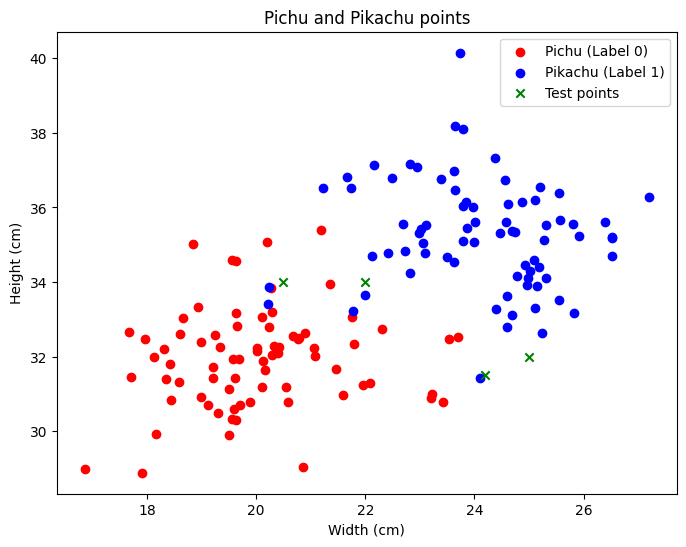

In [120]:
import matplotlib.pyplot as plt
import re

# Creating figure for plotting
plt.figure(figsize=(8, 6))

pichu_x = [point['width'] for point in label_0_data]
pichu_y = [point['height'] for point in label_0_data]

pikachu_x = [point['width'] for point in label_1_data]
pikachu_y = [point['height'] for point in label_1_data]

# Creating a scatter plot with colors based on "labels, "c" specifies every color based on "labels"
plt.scatter(pichu_x, pichu_y, c="red", marker="o", label="Pichu (Label 0)")
plt.scatter(pikachu_x, pikachu_y, c="blue", marker="o", label="Pikachu (Label 1)")

test_x = []
test_y = []

with open('testpoints.txt', 'r') as file:
    for line in file:
        matches = re.findall(r'\(([\d.]+), ([\d.]+)\)', line)
        if matches:
            width, height = map(float, matches[0])
            test_x.append(width)
            test_y.append(height)

plt.scatter(test_x, test_y, c="green", marker="x", label="Test points")

plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")

plt.legend()

plt.title("Pichu and Pikachu points")

plt.show()


## Calculating distance between points

In [119]:
import numpy as np

# Calculating the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1['width'] - point2['width'])** 2 + (point1['height'] - point2['height']) ** 2)

# Converting tuples
label_0_data = [{'width': point['width'], 'height': point['height'], 'label': point['label']} for point in label_0_data]
label_1_data = [{'width': point['width'], 'height': point['height'], 'label': point['label']} for point in label_1_data]

all_data = label_0_data + label_1_data

num_data_points = len(all_data)
num_test_points = len(test_x)

# Creating array to store distances
Distances = np.zeros((num_data_points, num_test_points))

# calculating distance between all data points
for i in range(num_data_points):
    for j in range (num_test_points):
        test_point = {'width': test_x[j], 'height': test_y[j]}
        Distances[i][j] = euclidean_distance(all_data[i], test_point)

for i in range(num_data_points):
    for j in range(num_test_points):
        print(f"Distance between data point {i} and test point {j}: {Distances[i][j]}")




Distance between data point 0 and test point 0: 5.704966703971587
Distance between data point 0 and test point 1: 5.367714999626179
Distance between data point 0 and test point 2: 2.101346173476415
Distance between data point 0 and test point 3: 1.1133281192301259
Distance between data point 1 and test point 0: 4.8565059845288605
Distance between data point 1 and test point 1: 4.045493146890496
Distance between data point 1 and test point 2: 2.99496766493296
Distance between data point 1 and test point 3: 2.3854874423691874
Distance between data point 2 and test point 0: 5.3105382062056155
Distance between data point 2 and test point 1: 4.530641669318392
Distance between data point 2 and test point 2: 3.1011453496079766
Distance between data point 2 and test point 3: 2.221898070059663
Distance between data point 3 and test point 0: 6.452730547409747
Distance between data point 3 and test point 1: 5.619463373614143
Distance between data point 3 and test point 2: 4.344052451472348
Distan

## deciding which pokemon based on closest point

In [125]:

closest_labels = []

# Determining if Pichu or Pikachu is the closest
for i in range(num_test_points):
    closest_label = None
    min_distance = float('inf')  
    for j in range(num_data_points):
        if i != j:  
            distance = Distances[j][i]
            if distance < min_distance:
                min_distance = distance
                if j < len(label_0_data):
                    closest_label = "Pichu"
                else:
                    closest_label = "Pikachu"
    closest_labels.append(closest_label)

for i, test_points in enumerate(zip(test_x, test_y)):
    print(f"Sample with (width, height): {test_points} classified as {closest_labels[i]}")


Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


## Uppgift 1

In [126]:
# Allowing the user to input a test point
while True:
    try:
        width = float(input("Enter the test point width: "))
        height = float(input("Enter the height of the test point: "))
        test_point = {'width': width, 'height': height}
        break
    except ValueError:
        print("Invalid input")

# Calculating the closest label
min_distance = float('inf')
closest_label = None
for i in range(num_data_points):
    distance = euclidean_distance(test_point, all_data[i])
    if distance < min_distance:
        min_distance = distance
        if i < len(label_0_data):
            closest_label = "Pichu"
        elif i < len(label_0_data) + len(label_1_data):
            closest_label = "Pikachu"

print(f"Test point with (width, height): {test_point} is classified as {closest_label}") # This code was from chat gpt


Test point with (width, height): {'width': 55.0, 'height': 66.0} is classified as Pikachu


## Uppgift 2

In [127]:
import numpy as np
from operator import itemgetter 
from collections import Counter

def euclidean_distance(point1, point2):
    return np.sqrt((point1['width'] - point2['width']) ** 2 + (point1['height'] - point2['height']) **2)

test_points = [{'width': width, 'height': height} for width, height in zip(test_x, test_y)]

class_to_name = {0: 'Pichu', 1: 'Pikachu'}

# looping through each testingpoint and calculating distance between all points and the all_data points
for j in range(num_test_points):
    distances = [(i, Distances[i][j]) for i in range(num_data_points)]

sorted_distances = sorted(distances, key=itemgetter(1))

n = 5
# sorting distances
closest_indices = [index for index, _ in sorted_distances[:n]]

# getting 10 closest points
closest_labels = [all_data[i]['label'] for i in closest_indices]

majority_vote_class = Counter(closest_labels).most_common(1)[0][0]
majority_vote_name = class_to_name.get(majority_vote_class, 'unknown')

print(f"Test point (width, height): {test_points[j]} belongs to class: {majority_vote_name}")


Test point (width, height): {'width': 20.5, 'height': 34.0} belongs to class: Pichu


## Uppgift 3

In [128]:
import random

random.shuffle(label_1_data)
random.shuffle(label_0_data)

num_training_samples = 100
num_test_samples = 50

# Splitting the shuffled pikachu data into training and test sets, // means integer division
pikachu_training = label_1_data[: num_training_samples // 2]
pikachu_test = label_1_data[num_training_samples // 2:num_training_samples // 2 + num_test_samples // 2]

# splitting shuffled pichu data
pichu_training = label_0_data[: num_training_samples // 2]
pichu_test = label_0_data[num_training_samples // 2:num_training_samples // 2 + num_test_samples // 2]

training_data = pikachu_training + pichu_training
test_data = pikachu_test + pichu_test

random.shuffle(training_data)
random.shuffle(test_data)

# Creating tagged training_data and test_data
pikachu_training_label = [(item, "Pikachu") for item in pikachu_training]
pichu_training_label = [(item, "Pichu") for item in pichu_training]
training_data_label = pikachu_training_label + pichu_training_label

pikachu_test_label = [(item, "Pikachu") for item in pikachu_test]
pichu_test_label = [(item, "Pichu") for item in pichu_test]
test_data_label = pikachu_test_label + pichu_test_label

random.shuffle(training_data_label)
random.shuffle(test_data_label)

print("Training Data:")
for item, label in training_data_label:
    print(f"{label}: {item}")

print("\nTest Data:")
for item, label in test_data_label:
    print(f"{label}: {item}")



Training Data:
Pichu: {'width': 19.299333494980544, 'height': 30.486337996080024, 'label': 0.0}
Pikachu: {'width': 24.991105175469915, 'height': 34.10979431232785, 'label': 1.0}
Pikachu: {'width': 23.388322747322558, 'height': 36.769999842308025, 'label': 1.0}
Pichu: {'width': 20.282109030336354, 'height': 33.18796105898338, 'label': 0.0}
Pikachu: {'width': 25.31359693611633, 'height': 35.516462459726284, 'label': 1.0}
Pikachu: {'width': 22.493387946548573, 'height': 36.78517041843648, 'label': 1.0}
Pikachu: {'width': 25.311244044578427, 'height': 34.117212558131975, 'label': 1.0}
Pichu: {'width': 19.55060327163345, 'height': 34.602756266320824, 'label': 0.0}
Pikachu: {'width': 24.601954468608902, 'height': 32.78817486174627, 'label': 1.0}
Pichu: {'width': 19.689909518113225, 'height': 31.931042667213433, 'label': 0.0}
Pichu: {'width': 18.990689973799388, 'height': 32.387963045016726, 'label': 0.0}
Pikachu: {'width': 24.387651550868913, 'height': 33.2827564295772, 'label': 1.0}
Pikachu

## Uppgift 4

<function matplotlib.pyplot.show(close=None, block=None)>

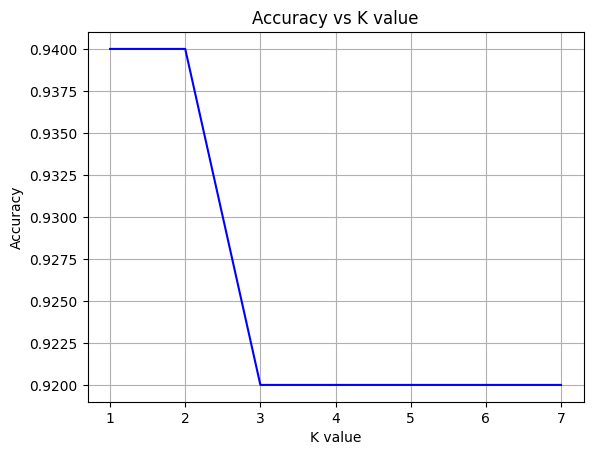

In [129]:
import math
import matplotlib.pyplot as plt

accuracy_val = []
k_val = []

def calculate_distance(point1, point2):
    # Access 'width' and 'height' values from the dictionaries
    width1, height1 = point1['width'], point1['height']
    width2, height2 = point2['width'], point2['height']
    
    # Calculate the Euclidean distance
    return math.sqrt((width1 - width2)**2 + (height1 - height2)**2)


# going through different values for k(1-8)
for k in range(1, 8):
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    # going through test data and calculating distances, sort them, counting and choosing maj class, and also uppdate tp, fp, fn, tn on the real labels
    for test_point, actual_label in test_data_label:
        distances = [(calculate_distance(test_point, train_point), train_label) for train_point, train_label in training_data_label]
        
        # Rest of your code for distance calculation and classification
        sorted_distances = sorted(distances, key=lambda x: x[0])
        k_nearest = sorted_distances[:k]

        pikachu_count = sum(1 for _, label in k_nearest if label == "Pikachu")
        pichu_count = sum(1 for _, label in k_nearest if label == "Pichu")

        predicted_label = "Pikachu" if pikachu_count > pichu_count else "Pichu"

        if predicted_label == "Pikachu" and actual_label == "Pikachu":
            TP += 1
        elif predicted_label == "Pikachu" and actual_label == "Pichu":
            FP += 1
        elif predicted_label == "Pichu" and actual_label == "Pikachu":
            FN += 1
        else:
            TN += 1
    
    # calculating accuracy
    Total = len(test_data_label)
    accuracy = (TP + TN) / Total

    # adding k_val and accuracy for plotting
    accuracy_val.append(accuracy)
    k_val.append(k)

plt.plot(k_val, accuracy_val, color= "blue")
plt.title("Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show